# Notebook for Generating PDF from dI/I

## Theory of Electron Scattering

See [Centurion et al](https://www.annualreviews.org/doi/abs/10.1146/annurev-physchem-082720-010539) for a full discription of the theory. 

Electrons being scattered by an arbitrary electric field, $V(\vec{r})$, can be described using the Born approximation to the Schrodinger equation via: 

\begin{equation}
\tag{1}
f(\vec{s}) = {m \over 2 \pi \hbar^{2}} \int exp(-i \vec{s} \cdot \vec{r'}) V(\vec{r'}) d^{3} r' 
\end{equation}

where $\vec{s}$ is the momentum transfer of the scattered electron with mass $m$. In MeV-UED experiments, the dominant electron-matter interaction is Coulombic, thus it is possible to represent the scattered wave function by a Fourier transform of the Coulombic potential field. 

\begin{equation}
\tag{2}
f(\vec{s}) = {m e \over 2 \pi \varepsilon_0 \hbar} {1 \over 2} \int exp(-i \vec{s} \cdot \vec{r}) \rho (\vec{r}) d^{3} r 
\end{equation} 

Here, $\rho(\vec{r})$ is the charge distribution of the sample and $s^{-2}$ is a prefactor. Equation 2 shows that the amplitude of the elastic scattering is proportional to the Fourier transform of $\rho(\vec{r})$.

The charge density of the nucleus and the electron of an atom with an atomic number $Z$ can be given by 

\begin{equation}
\tag{3}
\rho(r) = Ze\delta(\vec{r}) + \rho_{e}(r)
\end{equation} 

where $r$ is the radial dimension in spherical coordinates. In combination with the atomic form factor equation of X-ray scattering, $F(s)$

\begin{equation}
\tag{4}
F(s) = 4\pi \int \rho_{e}(r) {\sin (sr) \over sr} r^{2} dr
\end{equation} 

equation 2 can be rewritten as 

\begin{equation} 
\tag{5}
f(s) = {me^{2} \over 2 \pi \varepsilon_{0} \hbar^{2}} {1 \over 2} \lbrack Z-F(s) \rbrack
\end{equation} 

Assuming the independent atom model (IAM), the elastic scattering of a molecule made of $N$ atoms is defined as 

\begin{equation}
\tag{6}
f_{M}(\vec{s}) = \sum_{i=1}^{N} f_{i} (s) e^{i\vec{s} \cdot \vec{r_{i}}}
\end{equation}

where $f_{i}(s)$ is the atomic form factor of the atom as given by Equation 5 and $\vec{r_{i}}$ is the position of vector of the atom. 

Following this, the total scattering of the molecule $I(s)$ of randomly oriented molecules can be found by 

\begin{equation}
\tag{7}
I(s) = I_{at} + I_{mol} = \sum_{i=1}^{N} |f_{i}(s)|^{2} + \sum_{i=1}^{N} \sum_{j=1, j \neq i}^{N} f_{i}^{\ast}(s) f_{j}(s) { \sin (s r_{ij}) \over s r_{ij}}
\end{equation}

Equation 7 gives the result of the IAM of a rigid molecule of an randomly oriented ensemble. See Centurion et al for additional corrections to Equation 7. 

When processing MeV-UED data, the scattering signal is best represented by 

\begin{equation}
\tag{8}
sM(s) = s {I_{mol} \over I_{at}}
\end{equation} 

The real-space pair distribution function (PDF) is found to be proportional to the probability of finding an atom pair at a distance $r$. This probability is given by

\begin{equation} 
\tag{9}
P(r) = r \int_{0}^{\infty} sM(s) \sin{sr} ds \approx r \int_{s_{min}}^{s_{max}} sM(s) \sin(sr) e^{-\alpha s^{2}} ds
\end{equation} 

As no experiment can measure out to an infinite $s$ value, the above approximation is applied where $e^{-\alpha s^{2}}$ is a damping factor. The following code produces simulated scattering patters based on computed xyz coordinates of a given molecule. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gued_theory as gt
import gued

## Simulate Static Scattering

In [2]:
help(gt.static_sim)

Help on function static_sim in module gued_theory:

static_sim(path_mol, mol_name, file_type, s_max=12, r_max=800, damp_const=33, plot=True, return_data=False)
    Calculates the static scattering of a molecule based on the structure. First, reads in the molecular structure using 
    load_molecular_structure then calculates the I atomic and I molecular using get_I_from_xyz. Then, using the I atomic and I molecular,
    calculated the sM and PDF using the get_sM_and_PDF_from_I function.
    
    ARGUMENTS:
    
    path_mol (str):
        path to the folder with the trajectory simulation
    mol_name (str):
        name of the xyz file
    file_type (str):
        '.xyz' or '.csv' but I think it only works with xyz currently 
    
    OPTIONAL ARGUMENTS:
    
    s_max (int):
        Default set to 12 inverse angstroms. Defines the maximum scattering range for consideration
    r_max (int):
        Default set to 800 (picometers). Defines the maximum r distance for consideration
    da

In [3]:
angs = '\u00C5' # Angstrom sign
path_mol='packages/Molecular_coordinates/' # The molecular .xyz/.csv pathes
# path_dcs='/sdf/data/lcls/ds/ued_testfac/scratch/gued_online_analysis/jupyter_notebook/user_notebooks/dcs_repository/3.7MeV/';
mol_name='o-ntph_opt'
file_type='.xyz' # Molecular geometries, .xyz or .csv file, coordinates saved in 'Molecular_coordinates'

s_max = 12 # Max Q range
r_max = 800  # Max R range
damp_const=33

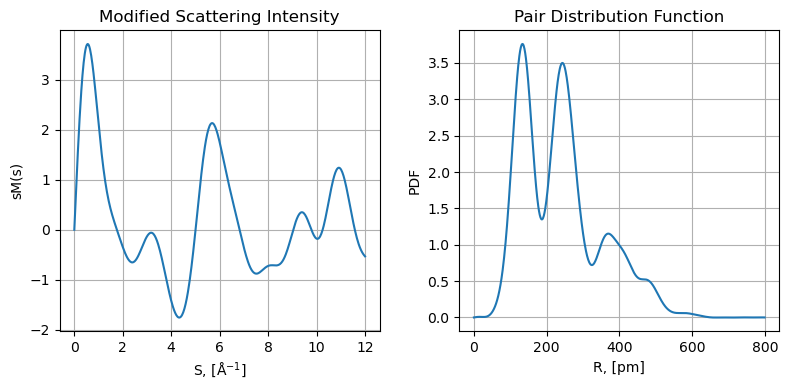

In [4]:
I_at, I_mol, s_theory, sM_theory, PDF_theory, r_theory = gt.static_sim(path_mol, mol_name, file_type, plot=False, return_data=True)
# plot_I_sM_PDF(I,sM,PDF,s,r,mol_name+' I elastic',mol_name+' sM',mol_name+' PDF'); # use or not using plot-function 
plt.figure(figsize=(8,4))
    
plt.subplot(1,2,1)    
plt.plot(s_theory,sM_theory)
plt.xlabel(r'S, ['+angs+'$^{-1}$]')
plt.ylabel('sM(s)')
plt.title('Modified Scattering Intensity')
plt.grid()
    
plt.subplot(1,2,2)    
plt.plot(r_theory,PDF_theory)
plt.xlabel(r'R, [pm]')
plt.ylabel('PDF')
plt.title('Pair Distribution Function')
plt.grid()
    
plt.tight_layout()
plt.show()

## Load Experimental Data

By specifying either run_numbers as a list of ints or run_numbers='all' you can choose how much of the data you wish to load

In [5]:
file_name = "o-ntph_data_2024-07-05.h5"
group_name = "s4"
run_numbers = list(np.arange(0,8,1)) 
variable_names = ["I", "stage_positions", "centers"]

In [12]:
# Read combined data
combined_data = gued.read_combined_data(file_name, group_name, variable_names, run_numbers=run_numbers)
print(combined_data.keys())
combined_I = combined_data['I']
combined_stage = combined_data['stage_positions']

dict_keys(['I', 'stage_positions', 'centers'])


### Remove any additional images based on index

For problem images that weren't removed in the preprocessing but that are disrupting the data.

In [18]:
#bad_idx = np.where(combined_stage==154.72)[0]

bad_idx = [374]
print(bad_idx)
mask = np.ones(combined_stage.shape, dtype=bool)
mask[bad_idx] = False

combined_stage = combined_stage[mask]
combined_I = combined_I[mask]

[374]


## Set Up Independent variables

In [13]:
uni_stage = uni_stage = np.unique(combined_stage) # Pump-probe stage position
s_cali = 0.0226 # S calibration in experiment
#s_cali = 0.02134
posi_0    = 154.405 # time for s4
#posi_0 = 108.61  # time zero for s1
s = np.arange(0,len(combined_I[0]))*s_cali # The Q axis
realtime = (uni_stage-posi_0)/0.15  # Delay axis in ps

## Averaging Based on Delay Position

In [14]:
stage_len = len(uni_stage);               #  Number of delays
azimuthal_data = np.ones((stage_len, len(combined_I[0]))); #  Delay dependent averaged pp images

if stage_len>20:
    prt_count = 5
else:
    prt_count = 1  
for i in range(stage_len):
    if i%prt_count == 0:
        print('Averaging data at stage posi # '+ str(i) + ', ' + str(uni_stage[i]) + ' mm') # Obtain a sub array to save the data in one delay
    stage_data = combined_I[np.where(combined_stage==uni_stage[i])[0]];
    azimuthal_data[i] = np.nanmean(stage_data,axis=0); # no subtracting background


Averaging data at stage posi # 0, 153.0 mm
Averaging data at stage posi # 5, 154.375 mm
Averaging data at stage posi # 10, 154.425 mm
Averaging data at stage posi # 15, 154.475 mm
Averaging data at stage posi # 20, 154.525 mm
Averaging data at stage posi # 25, 154.6 mm
Averaging data at stage posi # 30, 154.795 mm
Averaging data at stage posi # 35, 157.5 mm


## Plot dI/I 

98


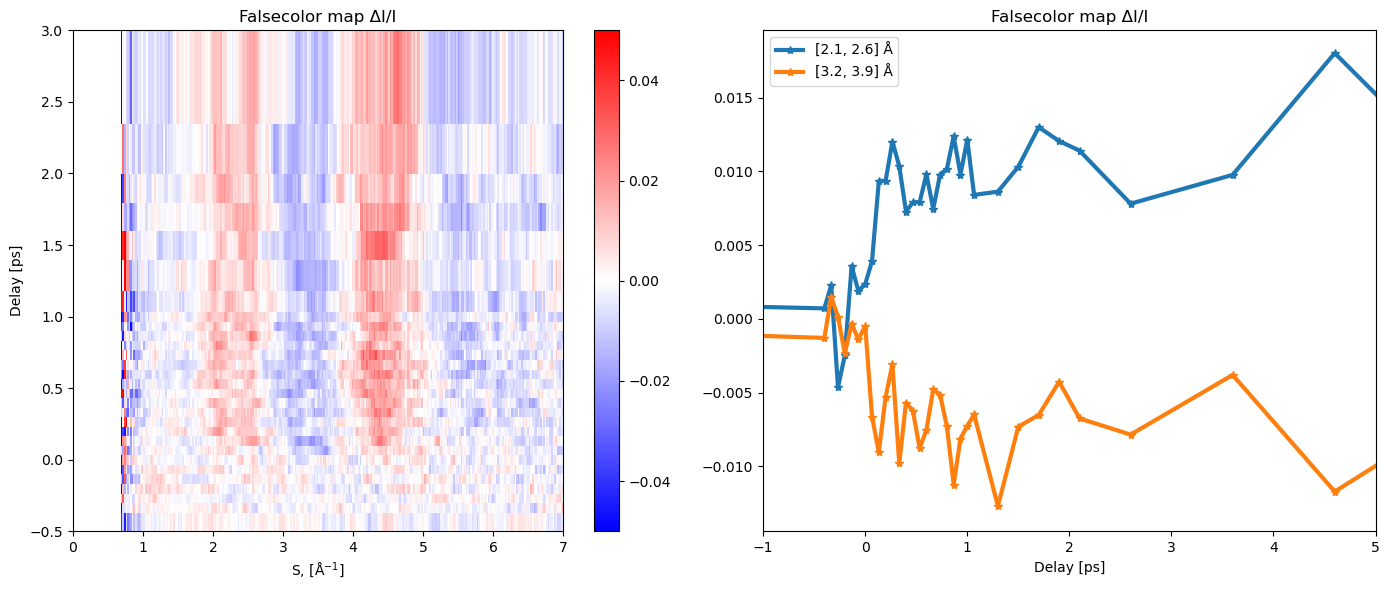

In [15]:
if stage_len<5: # Make up the reference signals
    N_ref = 2
else:
    N_ref = 5
norm_ref = np.nanmean(azimuthal_data[:N_ref],axis=0)         # Reference signal before T0

dI_I = (azimuthal_data-norm_ref)/norm_ref # Calculate the percentage difference signal

dI_I_fit = gued.poly_fit(dI_I, s, plot=False)

# Plot a figure of the time-depdendent signal of scattering percentage difference.

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.pcolor(s,realtime,dI_I_fit,cmap='bwr')
plt.clim(vmin=-0.05, vmax=0.05)
plt.colorbar()
plt.ylim(-0.5, 3)
plt.xlim(0, 7)
plt.xlabel(r'S, ['+angs+'$^{-1}$]')
plt.ylabel('Delay [ps]')
plt.title('Falsecolor map ΔI/I')

plt.subplot(1,2,2)
RoI_1 = [2.1, 2.6]
RoI_2 = [3.2, 3.9]
print(round(RoI_1[0]/0.0215))
Inte_1 = dI_I_fit[:,round(RoI_1[0]/s_cali):round(RoI_1[1]/s_cali)].mean(axis=1)
Inte_2 = dI_I_fit[:,round(RoI_2[0]/s_cali):round(RoI_2[1]/s_cali)].mean(axis=1)
plt.plot(realtime,Inte_1,'-*',linewidth=3,label=str(RoI_1)+' '+angs)
plt.plot(realtime,Inte_2,'-*',linewidth=3,label=str(RoI_2)+' '+angs)
plt.xlim(-1, 5)
plt.legend()
plt.xlabel('Integrated Yield [arb.]')
plt.xlabel('Delay [ps]')
plt.title('Falsecolor map ΔI/I')

plt.tight_layout()
plt.show()


## View Gaussian Filtered dI/I

Text(0.5, 1.0, 'Falsecolor map filtered ΔI/I')

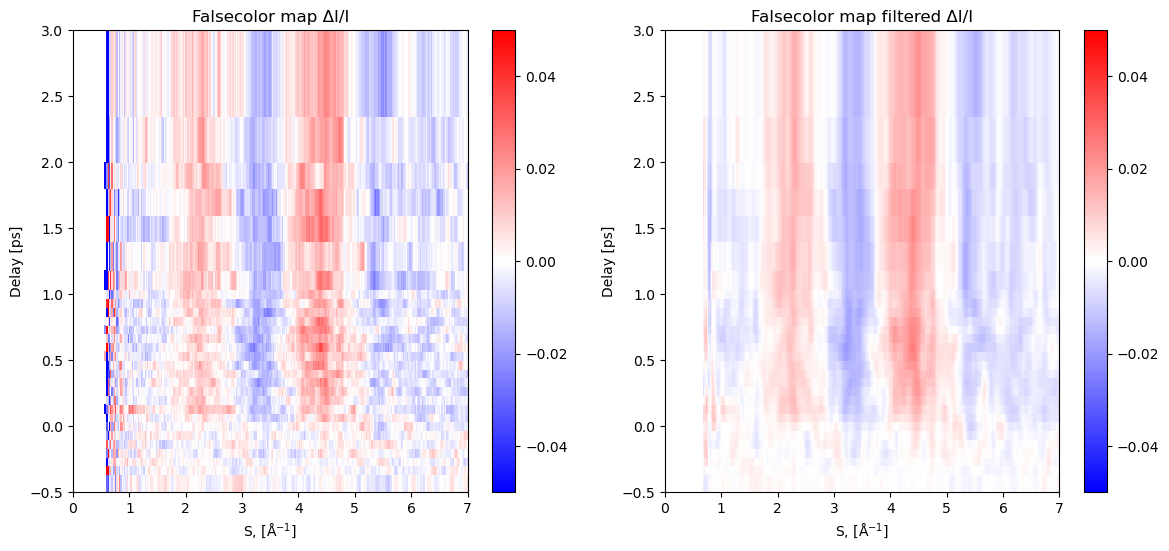

In [39]:
# apply gaussian filter?
from scipy.ndimage import gaussian_filter

filtered_dI_I = gaussian_filter(dI_I_fit, sigma=1)
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pcolor(s,realtime,dI_I_fit,cmap='bwr')
plt.clim(vmin=-0.05, vmax=0.05)
plt.colorbar()
plt.ylim(-0.5, 3)
plt.xlim(0, 7)
plt.xlabel(r'S, ['+angs+'$^{-1}$]')
plt.ylabel('Delay [ps]')
plt.title('Falsecolor map ΔI/I')

plt.subplot(1,2,2)
plt.pcolor(s, realtime, filtered_dI_I, cmap='bwr')
plt.clim(vmin=-0.05, vmax=0.05)
plt.colorbar()
plt.ylim(-0.5, 3)
plt.xlim(0, 7)
plt.xlabel(r'S, ['+angs+'$^{-1}$]')
plt.ylabel('Delay [ps]')
plt.title('Falsecolor map filtered ΔI/I')

## Check s Calibration Fit to Experimental Data -- Buggy. Needs Work

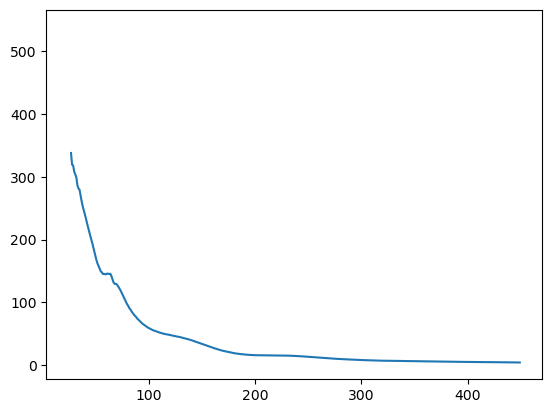

In [41]:
plt.figure()
plt.plot(norm_ref)
plt.show()

In [10]:
path_mol='packages/Molecular_coordinates/'    # The molecular .xyz/.csv pathes
mol_name='o-ntph_opt'
file_type='.xyz'# Molecular geometries, .xyz or .csv file, coordinates saved in 'Molecular_coordinates'

s_max = 12             # Max Q range
r_max = 800            # Max R range in pm
damp_const=33          # damping factor

left   = 1   # Left side range in S
right  = 9.5     # Right side range in S

coor, atom_sum = gt.load_molecular_structure(path_mol, mol_name, file_type)

s_cali = gt.scan_s_calibration(0.0225, 0.025, left,right,s_max,coor,atom_sum,damp_const,r_max, norm_ref)
print(s_cali)

s_calibration: 0.02248 angs^-1/pixel
0.02248


zeros:
[1.7566867059552564, 5.003734344143147, 6.818705168511202, 9.035759002440653, 9.785922728845817]


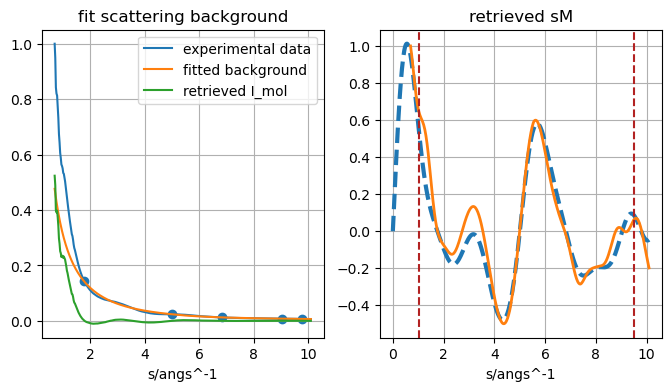

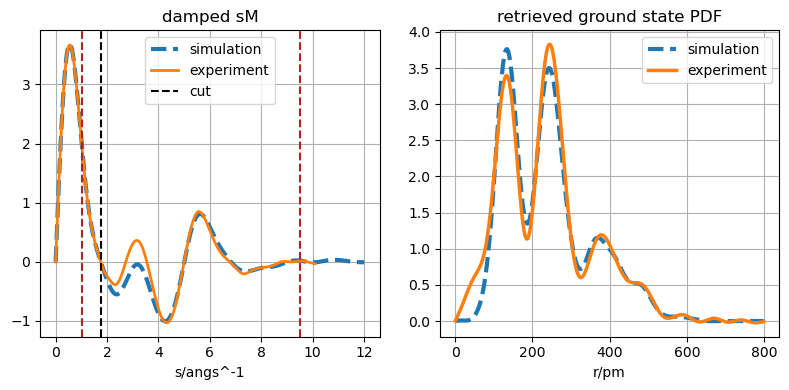

In [11]:
# (4) Extratin the static scattering signal
s_cali = 0.02248
coor, atom_sum  = gt.load_molecular_structure(path_mol,mol_name,file_type)
I_tot, I_at, I_mol, s_theory = gt.get_I_from_xyz(coor, atom_sum)
# [sM,PDF,r]       = get_sM_and_PDF_from_I(I_at,I_mol,s,r_max,damp_const)


I_ground_state=norm_ref; # experimental static scattering signal
#I_ground_state = np.nanmean(norm_data[5:20], axis=0)

gt.retrieve_PDF(left,right,s_cali, s_max,coor,atom_sum,damp_const,r_max,I_ground_state);# function to retrive to retrive the static signal

## Calculate sM & PDF

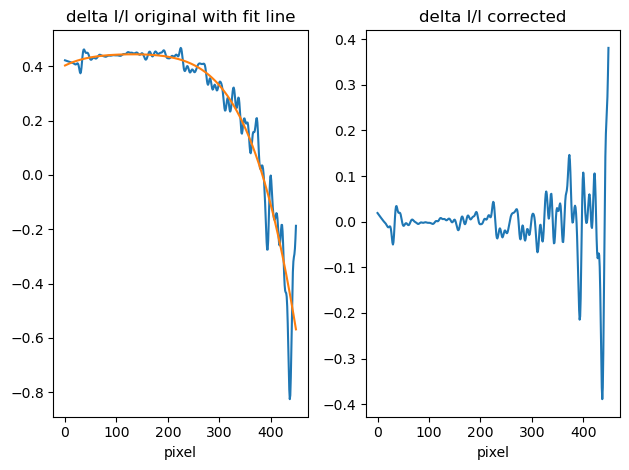

s calibration value is 0.0226
1/alpha value for damping constant is 34.372139215845785


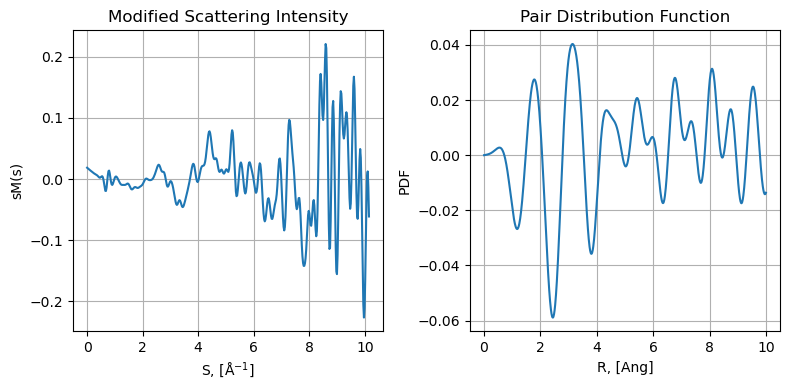

In [12]:
dI = (azimuthal_data - norm_ref)
sM_exp, pdf_exp, r_exp = gt.get_exp_sM_PDF(coor, atom_sum, s, dI, freq_filter=True, polyfit=True, degree=4, gauss_filter=False, sigma=0.5,  
                                           powerfit=False, plot=False)

plt.figure(figsize=(8,4))
    
plt.subplot(1,2,1)    
plt.plot(s,sM_exp[10])
plt.xlabel(r'S, ['+angs+'$^{-1}$]')
plt.ylabel('sM(s)')
plt.title('Modified Scattering Intensity')
plt.grid()
    
plt.subplot(1,2,2)    
plt.plot(r_exp,pdf_exp[30])
plt.xlabel(r'R, [Ang]')
plt.ylabel('PDF')
plt.title('Pair Distribution Function')
plt.grid()
    
plt.tight_layout()
plt.show()

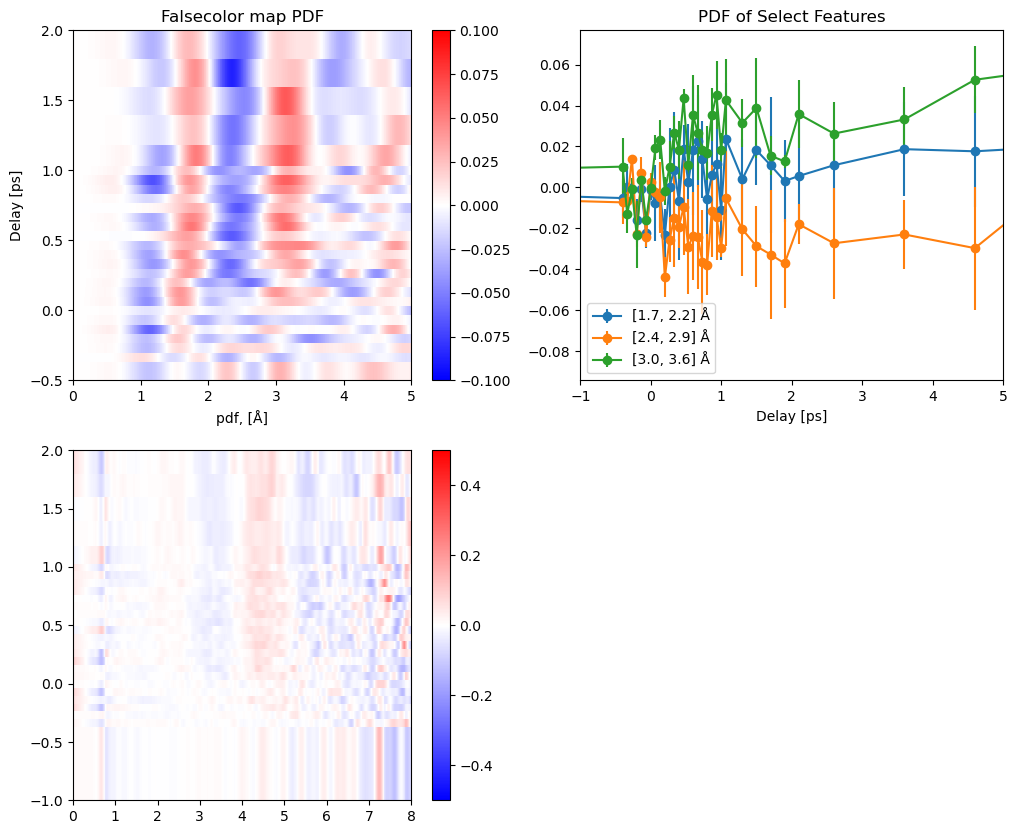

In [13]:
RoI_1 = [1.7, 2.2]
RoI_2 = [2.4, 2.9]
RoI_3 = [3.0, 3.6]
r = r_exp

Inte_1 = np.mean(pdf_exp[:, (np.where((r > RoI_1[0]) & (r < RoI_1[1]))[0])], axis=1)
std_1 = np.std(pdf_exp[:, (np.where((r > RoI_1[0]) & (r < RoI_1[1]))[0])], axis=1)
Inte_2 = np.mean(pdf_exp[:, (np.where((r > RoI_2[0]) & (r < RoI_2[1]))[0])], axis=1)
std_2 = np.std(pdf_exp[:, (np.where((r > RoI_2[0]) & (r < RoI_2[1]))[0])], axis=1)
Inte_3 = np.mean(pdf_exp[:, (np.where((r > RoI_3[0]) & (r < RoI_3[1]))[0])], axis=1)
std_3 = np.std(pdf_exp[:, (np.where((r > RoI_3[0]) & (r < RoI_3[1]))[0])], axis=1)

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.pcolor(r, realtime, pdf_exp,cmap='bwr')
# plt.axvline(x = RoI_1[0], color = 'k', linestyle = '-',linewidth=1)
# plt.axvline(x = RoI_1[1], color = 'k', linestyle = '-',linewidth=1)
# plt.axvline(x = RoI_2[0], color = 'k', linestyle = '-',linewidth=1)
# plt.axvline(x = RoI_2[1], color = 'k', linestyle = '-',linewidth=1)
# plt.axvline(x = RoI_3[0], color = 'k', linestyle = '-',linewidth=1)
# plt.axvline(x = RoI_3[1], color = 'k', linestyle = '-',linewidth=1)
plt.clim(vmin=-0.1, vmax=0.1)
plt.colorbar()
plt.ylim(-0.5, 2.0)
plt.xlim(0, 5)
plt.xlabel(f"pdf, [{angs}]")
plt.ylabel('Delay [ps]')
plt.title('Falsecolor map PDF')

plt.subplot(2,2,2)
plt.errorbar(realtime,Inte_1, yerr=std_1,  fmt='-o',  label=str(RoI_1)+' '+angs);
plt.errorbar(realtime, Inte_2, yerr=std_2,  fmt='-o', label=str(RoI_2)+' '+angs);
plt.errorbar(realtime, Inte_3, yerr = std_3, fmt='-o', label=str(RoI_3)+' '+angs)
plt.xlim(-1, 5)
plt.legend()
plt.xlabel('Integrated Yield [arb.]');plt.xlabel('Delay [ps]');plt.title('PDF of Select Features')

plt.subplot(2,2,3)
plt.pcolor(s, realtime, sM_exp, cmap='bwr')
plt.clim(vmin=-0.5, vmax=0.5)
plt.colorbar()
plt.xlim(0,8)
plt.ylim(-1, 2)

plt.show()